## 5. Cluster_DatosBarrio_7Cluster

### Objetivo

Generar cluster's de estaciones en base a las variables geográficas con el objetivo de obtener una cantidad fija para k=7 

### Descripción General de notebook

    1. Carga de datos base proveniente de etapa de preparación
    2. Reducción de dimensionalidad PCA
    3. Selección de valor k óptimo utilizando Elbow y Silhouette
    4. Clusterización final en base a k

## 1. Carga de datos de entrada

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

%matplotlib inline

pd.set_option('display.max_rows', 5)

In [5]:
df_FinalCluster_Original = pd.read_csv('../../data/df_FinalCluster_2017_2019.csv',
                              dtype={'Distrito':'category','Plazas':'category','Barrio':'category'})

df_FinalCluster_Original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ESTACION             172 non-null    int64   
 1   DEMANDA_RATIO        172 non-null    float64 
 2   DMNDA_201703         172 non-null    float64 
 3   DMNDA_201704         172 non-null    float64 
 4   DMNDA_201705         172 non-null    int64   
 5   DMNDA_201706         172 non-null    int64   
 6   DMNDA_201707         172 non-null    int64   
 7   DMNDA_201708         172 non-null    int64   
 8   DMNDA_201709         172 non-null    int64   
 9   DMNDA_201710         172 non-null    int64   
 10  DMNDA_201711         172 non-null    int64   
 11  DMNDA_201712         172 non-null    float64 
 12  DMNDA_201801         172 non-null    float64 
 13  DMNDA_201802         172 non-null    int64   
 14  DMNDA_201803         172 non-null    int64   
 15  DMNDA_201804         17

### Selección de Variables Geográficas

In [6]:
df_FinalCluster = df_FinalCluster_Original.copy()

df_FinalCluster = df_FinalCluster.drop(columns='ESTACION')

df_FinalCluster = df_FinalCluster.drop(columns=['DEMANDA_RATIO',
    'DMNDA_201703', 'DMNDA_201704', 'DMNDA_201705', 'DMNDA_201706', 
    'DMNDA_201707', 'DMNDA_201708', 'DMNDA_201709', 'DMNDA_201710', 'DMNDA_201711', 'DMNDA_201712',
    'DMNDA_201801', 'DMNDA_201802', 'DMNDA_201803', 'DMNDA_201804', 'DMNDA_201805', 'DMNDA_201806', 
    'DMNDA_201807', 'DMNDA_201808', 'DMNDA_201809', 'DMNDA_201810', 'DMNDA_201811', 'DMNDA_201812',
    'DMNDA_201901', 'DMNDA_201902', 'DMNDA_201903', 'DMNDA_201904', 'DMNDA_201905', 'DMNDA_201906', 
    'DMNDA_201907', 'DMNDA_201908', 'DMNDA_201909', 'DMNDA_201910', 'DMNDA_201911', 'DMNDA_201912',
                                                'Plazas', 'Tasa_Paro', 'Renta_Media_Persona',
                                               'Renta_Media_Hogar', 'Poblacion'])

df_FinalCluster.info()

num_cols = list(df_FinalCluster._get_numeric_data().columns)
cat_cols = list(set(df_FinalCluster.columns) - set(num_cols))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Gis_X     172 non-null    float64 
 1   Gis_Y     172 non-null    float64 
 2   Distrito  172 non-null    category
 3   Barrio    172 non-null    category
 4   Longitud  172 non-null    float64 
 5   Latitud   172 non-null    float64 
dtypes: category(2), float64(4)
memory usage: 7.5 KB


In [7]:
print(num_cols)
print(cat_cols)

['Gis_X', 'Gis_Y', 'Longitud', 'Latitud']
['Distrito', 'Barrio']


## 2. Reducción de dimensionalidad PCA

### Transformando categóricas: One Hot Encoder (variables dummies)

In [9]:
df_cat = df_FinalCluster[cat_cols]
df_cat

,Distrito,Barrio
0,1,01-06
1,1,01-06
...,...,...
170,5,05-01
171,2,02-01


In [10]:
OneHot = OneHotEncoder(handle_unknown='ignore', drop='first')
OneHot.fit(df_cat.values)

df_cat_OneHot = OneHot.transform(df_cat.values).toarray()
df_cat_OneHot.shape

(172, 40)

### Concatenación de DF: Numéricos y Categóricas

In [11]:
df_knn_final = pd.concat([df_FinalCluster[num_cols], pd.DataFrame(df_cat_OneHot)], axis=1)
df_knn_final.columns = df_knn_final.columns.astype(str)
df_knn_final.info()
df_knn_final

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 44 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gis_X     172 non-null    float64
 1   Gis_Y     172 non-null    float64
 2   Longitud  172 non-null    float64
 3   Latitud   172 non-null    float64
 4   0         172 non-null    float64
 5   1         172 non-null    float64
 6   2         172 non-null    float64
 7   3         172 non-null    float64
 8   4         172 non-null    float64
 9   5         172 non-null    float64
 10  6         172 non-null    float64
 11  7         172 non-null    float64
 12  8         172 non-null    float64
 13  9         172 non-null    float64
 14  10        172 non-null    float64
 15  11        172 non-null    float64
 16  12        172 non-null    float64
 17  13        172 non-null    float64
 18  14        172 non-null    float64
 19  15        172 non-null    float64
 20  16        172 non-null    float6

,Gis_X,Gis_Y,Longitud,Latitud,0,1,2,3,4,5,...,30,31,32,33,34,35,36,37,38,39
0,440443.61,4474290.65,-3.701998,40.417111,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,440480.56,4474301.74,-3.701564,40.417213,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,441672.11,4477914.69,-3.687851,40.449845,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,439113.04,4473926.40,-3.717646,40.413733,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Reducción de dimensionalidad PCA

In [12]:
df_pca_2 = PCA(n_components=2).fit_transform(df_knn_final)
df_pca_3 = PCA(n_components=3).fit_transform(df_knn_final)
df_pca_4 = PCA(n_components=4).fit_transform(df_knn_final)
df_pca_5 = PCA(n_components=5).fit_transform(df_knn_final)


In [13]:
df_pca_3

array([[-7.83903561e+02,  5.31648857e+02, -1.35290590e-02],
       [-7.70648416e+02,  4.95419150e+02, -1.56306065e-02],
       [-4.15257075e+02,  8.62803087e+02, -1.01232889e-02],
       [ 6.58095566e+02,  1.04843613e+03, -1.29357431e-01],
       [ 4.85785568e+02,  6.54139180e+02, -3.93892573e-02],
       [ 4.63065724e+02,  6.02044787e+02, -5.53024753e-02],
       [ 1.35274299e+01,  2.67682506e+02, -6.27968456e-02],
       [ 1.33145710e+02,  2.16955801e+02, -6.78423707e-02],
       [ 4.20665747e+02,  2.50287759e+01, -1.93130904e-01],
       [-9.82054125e+02,  1.15111740e+03,  2.24841999e-02],
       [ 3.11092459e+02,  7.25475824e+02, -3.21590281e-02],
       [ 4.63375751e+02,  9.54209150e+02, -2.38016298e-02],
       [ 1.51235029e+02,  1.54612034e+03,  5.17938437e-02],
       [ 2.10829206e+02,  1.03818508e+03, -1.43143301e-02],
       [-1.61300372e+02,  1.03055083e+03, -6.95494978e-03],
       [-1.21959396e+02,  7.51428502e+02, -2.18393142e-02],
       [-3.50983284e+02,  3.47401492e+02

## 3. Selección de valor k óptimo utilizando Elbow y Silhouette

### Usando df_pca_2

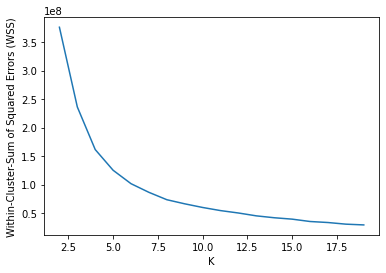

In [14]:
# ELBOW

K=range(2,20)
wss = []

for k in K:
    kmeans=cluster.KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,)
    kmeans=kmeans.fit(df_pca_2)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [15]:
# SILHOUETTE
K=range(2,20)
for k in K:
    labels=KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=200,).fit(df_pca_2).labels_
    print ("Silhouette score for k(clusters) = "+str(k)+" is "+str(metrics.silhouette_score(df_pca_2,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.3828919927318037
Silhouette score for k(clusters) = 3 is 0.3946112392335897
Silhouette score for k(clusters) = 4 is 0.41502241429586767
Silhouette score for k(clusters) = 5 is 0.39890562226257587
Silhouette score for k(clusters) = 6 is 0.3982510156845642
Silhouette score for k(clusters) = 7 is 0.39380192323258695
Silhouette score for k(clusters) = 8 is 0.3810069952805354
Silhouette score for k(clusters) = 9 is 0.36645827712199414
Silhouette score for k(clusters) = 10 is 0.36647452074323206
Silhouette score for k(clusters) = 11 is 0.36735282543878867
Silhouette score for k(clusters) = 12 is 0.37258447977285314
Silhouette score for k(clusters) = 13 is 0.3712879385544244
Silhouette score for k(clusters) = 14 is 0.3680497953853688
Silhouette score for k(clusters) = 15 is 0.35087612898777415
Silhouette score for k(clusters) = 16 is 0.35695653736584365
Silhouette score for k(clusters) = 17 is 0.353100108173255
Silhouette score for k(clusters) = 18 is

### Usando df_pca_3

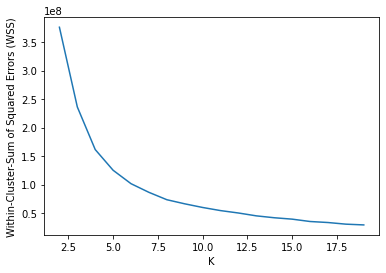

In [16]:
K=range(2,20)
wss = []

for k in K:
    kmeans=cluster.KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,)
    kmeans=kmeans.fit(df_pca_3)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [17]:
# SILHOUETTE
K=range(2,20)
for k in K:
    labels=KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=200,).fit(df_pca_3).labels_
    print ("Silhouette score for k(clusters) = "+str(k)+" is "+str(metrics.silhouette_score(df_pca_3,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.38289196983100704
Silhouette score for k(clusters) = 3 is 0.3946112157204953
Silhouette score for k(clusters) = 4 is 0.41502239185667755
Silhouette score for k(clusters) = 5 is 0.3989055920799822
Silhouette score for k(clusters) = 6 is 0.39825099408331627
Silhouette score for k(clusters) = 7 is 0.39380187227985297
Silhouette score for k(clusters) = 8 is 0.38100694084482234
Silhouette score for k(clusters) = 9 is 0.366458235877665
Silhouette score for k(clusters) = 10 is 0.3664745134980463
Silhouette score for k(clusters) = 11 is 0.36735273816176384
Silhouette score for k(clusters) = 12 is 0.3725843966592328
Silhouette score for k(clusters) = 13 is 0.3712878468237963
Silhouette score for k(clusters) = 14 is 0.3680497252200652
Silhouette score for k(clusters) = 15 is 0.3508760257019224
Silhouette score for k(clusters) = 16 is 0.35695647478049003
Silhouette score for k(clusters) = 17 is 0.3531000681047677
Silhouette score for k(clusters) = 18 is 0

### Usando df_pca_4

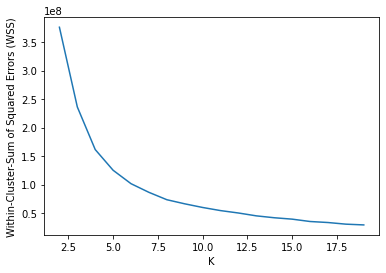

In [18]:
K=range(2,20)
wss = []

for k in K:
    kmeans=cluster.KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,)
    kmeans=kmeans.fit(df_pca_4)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [19]:
# SILHOUETTE
K=range(2,20)
for k in K:
    labels=KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=200,).fit(df_pca_4).labels_
    print ("Silhouette score for k(clusters) = "+str(k)+" is "+str(metrics.silhouette_score(df_pca_4,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.3828919619142104
Silhouette score for k(clusters) = 3 is 0.3946111906577565
Silhouette score for k(clusters) = 4 is 0.41502235881984256
Silhouette score for k(clusters) = 5 is 0.39890555482076456
Silhouette score for k(clusters) = 6 is 0.3982509517172425
Silhouette score for k(clusters) = 7 is 0.39380182128571833
Silhouette score for k(clusters) = 8 is 0.3810068988647026
Silhouette score for k(clusters) = 9 is 0.36645817884623766
Silhouette score for k(clusters) = 10 is 0.36647445522840555
Silhouette score for k(clusters) = 11 is 0.36735268920642733
Silhouette score for k(clusters) = 12 is 0.37258432675636094
Silhouette score for k(clusters) = 13 is 0.37128777227767246
Silhouette score for k(clusters) = 14 is 0.3680496627242903
Silhouette score for k(clusters) = 15 is 0.35087596232800244
Silhouette score for k(clusters) = 16 is 0.3569563994557062
Silhouette score for k(clusters) = 17 is 0.3531000003168198
Silhouette score for k(clusters) = 18 i

### Usando df_pca_5

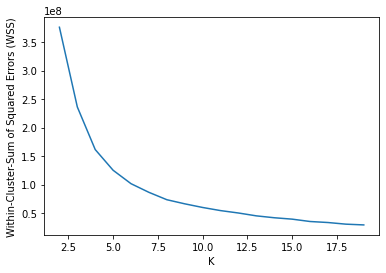

In [20]:
K=range(2,20)
wss = []

for k in K:
    kmeans=cluster.KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,)
    kmeans=kmeans.fit(df_pca_5)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [21]:
# SILHOUETTE
K=range(2,20)
for k in K:
    labels=KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=200,).fit(df_pca_5).labels_
    print ("Silhouette score for k(clusters) = "+str(k)+" is "+str(metrics.silhouette_score(df_pca_5,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.3828919517546103
Silhouette score for k(clusters) = 3 is 0.3946111761329105
Silhouette score for k(clusters) = 4 is 0.41502234022168716
Silhouette score for k(clusters) = 5 is 0.3989055291512853
Silhouette score for k(clusters) = 6 is 0.39825092723447425
Silhouette score for k(clusters) = 7 is 0.3938017920384144
Silhouette score for k(clusters) = 8 is 0.3810068676613226
Silhouette score for k(clusters) = 9 is 0.366458148644835
Silhouette score for k(clusters) = 10 is 0.3664744273827746
Silhouette score for k(clusters) = 11 is 0.36735264505622556
Silhouette score for k(clusters) = 12 is 0.37258428589820236
Silhouette score for k(clusters) = 13 is 0.37128773057237513
Silhouette score for k(clusters) = 14 is 0.3680496154862799
Silhouette score for k(clusters) = 15 is 0.3508759043278222
Silhouette score for k(clusters) = 16 is 0.3569563409479515
Silhouette score for k(clusters) = 17 is 0.3530999581835992
Silhouette score for k(clusters) = 18 is 0.3

#### CONCLUSIÓN: se determina que para todos los casos analizados, el mejor valor para la cantidad de cluster a trabajar es k=7

## 4. Clusterización final en base a k=7

La clusterización se ejecuta para cada DataFrame según PCA siempre considerando k=5. 
La ejecución del algoritmo final considera:

    - Estandarización: MinMaxScaler()
    - Clusterización: KMeans según parámetros observados en siguiente celda

#### Preparación de algoritmo

In [22]:
n_cluster = 7

scaler = MinMaxScaler()
kmeans = KMeans(
               n_clusters=n_cluster,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=200,)

pipeline = make_pipeline(scaler, kmeans)
pipeline

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kmeans',
                 KMeans(max_iter=500, n_clusters=7, n_init=50,
                        random_state=200))])

#### Predicción de cluster final

In [23]:
df_pred_pca2_t = pipeline.fit_transform(df_pca_2)
df_pred_pca2 = pipeline.fit_predict(df_pca_2)
df_pred_pca3 = pipeline.fit_predict(df_pca_3)
df_pred_pca4 = pipeline.fit_predict(df_pca_4)
df_pred_pca5 = pipeline.fit_predict(df_pca_5)


In [24]:
df_pred_pca2_t

array([[0.50915179, 0.16216855, 0.5277814 , ..., 0.3661738 , 0.10361798,
        0.1969592 ],
       [0.50197926, 0.15953522, 0.52377456, ..., 0.3586488 , 0.11121552,
        0.19296131],
       [0.58479738, 0.14303639, 0.50832273, ..., 0.41351473, 0.09374736,
        0.28094665],
       ...,
       [0.19901684, 0.46145655, 0.48690326, ..., 0.1532096 , 0.6031598 ,
        0.43469857],
       [0.63793482, 0.38639285, 0.04330205, ..., 0.36430096, 0.61885929,
        0.63989506],
       [0.7745148 , 0.36567943, 0.7099947 , ..., 0.63852935, 0.17514726,
        0.41805502]])

In [25]:
df_pred_pca2

array([5, 5, 5, 1, 1, 1, 1, 1, 1, 5, 1, 1, 3, 1, 5, 1, 1, 1, 5, 5, 5, 5,
       5, 5, 1, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6,
       6, 6, 1, 1, 1, 1, 4, 0, 0, 6, 0, 0, 0, 0, 0, 6, 6, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6,
       3, 3, 5, 6, 6, 2, 2, 2, 2, 1, 2, 2, 3, 1, 1, 1, 4, 3, 1, 4, 4, 5,
       1, 1, 5, 6, 1, 5, 5, 4, 6, 0, 0, 0, 0, 4, 3, 3, 6, 1, 5, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 5, 5, 5, 6, 4, 4, 2, 2, 1, 4, 4, 4, 2, 2,
       0, 6, 0, 2, 3, 0, 2, 6, 4, 3, 6, 0, 4, 2, 0, 4, 2, 5])

In [26]:
df_pred_pca3

array([1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 6, 4, 1, 4, 4, 4, 1, 1, 1, 1,
       1, 1, 4, 5, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 1, 1, 5, 5, 5, 5,
       5, 5, 4, 4, 4, 4, 3, 3, 3, 5, 3, 3, 3, 3, 3, 5, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5,
       6, 6, 1, 5, 5, 0, 0, 0, 0, 0, 0, 0, 6, 0, 4, 4, 2, 6, 4, 2, 2, 1,
       4, 4, 1, 5, 4, 1, 1, 3, 3, 3, 3, 3, 3, 2, 6, 6, 5, 4, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 4, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0,
       3, 5, 2, 0, 6, 3, 0, 3, 2, 6, 3, 3, 2, 0, 3, 2, 0, 1])

In [27]:
df_pred_pca4

array([2, 2, 5, 4, 5, 5, 2, 2, 4, 5, 5, 5, 5, 5, 5, 5, 2, 2, 5, 5, 5, 5,
       5, 5, 2, 2, 5, 2, 2, 5, 5, 5, 5, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2,
       2, 2, 5, 5, 2, 5, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 4, 5, 5, 5, 5, 5, 5, 2, 2, 2,
       4, 5, 2, 2, 2, 1, 6, 6, 4, 4, 4, 6, 4, 4, 4, 4, 3, 4, 4, 3, 3, 5,
       2, 2, 5, 2, 2, 5, 2, 0, 0, 0, 0, 0, 0, 3, 4, 5, 2, 4, 2, 6, 1, 1,
       1, 6, 4, 6, 4, 6, 4, 3, 5, 5, 5, 2, 3, 3, 6, 1, 4, 6, 3, 3, 6, 6,
       0, 2, 3, 6, 5, 0, 1, 0, 3, 5, 0, 0, 3, 1, 0, 3, 6, 5])

In [28]:
df_pred_pca5

array([3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 6, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 4, 4, 4, 4, 4, 6, 6, 6,
       2, 4, 6, 6, 6, 4, 5, 5, 2, 2, 2, 5, 2, 2, 2, 2, 1, 2, 2, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 1, 2, 4, 6, 2, 6, 5, 4, 4,
       4, 5, 2, 5, 2, 5, 2, 1, 3, 3, 3, 3, 1, 1, 5, 4, 2, 5, 1, 1, 5, 5,
       0, 6, 1, 5, 3, 0, 4, 0, 1, 3, 0, 0, 1, 4, 0, 1, 5, 3])

#### En base a lo observado y a las decisiones tomadas en este proyecto, el dataframe final a utilizar corresponde a PCA=3

El identificador de cluster para cada una de las estaciones se concatena con los valores originales y se exporta al CSV definitivo

In [29]:
df_final_Clusterizado = pd.concat([df_FinalCluster_Original, pd.DataFrame(df_pred_pca3)], axis=1)

df_final_Clusterizado.rename(columns={0: 'CLUSTER'}, inplace=True)
df_final_Clusterizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ESTACION             172 non-null    int64   
 1   DEMANDA_RATIO        172 non-null    float64 
 2   DMNDA_201703         172 non-null    float64 
 3   DMNDA_201704         172 non-null    float64 
 4   DMNDA_201705         172 non-null    int64   
 5   DMNDA_201706         172 non-null    int64   
 6   DMNDA_201707         172 non-null    int64   
 7   DMNDA_201708         172 non-null    int64   
 8   DMNDA_201709         172 non-null    int64   
 9   DMNDA_201710         172 non-null    int64   
 10  DMNDA_201711         172 non-null    int64   
 11  DMNDA_201712         172 non-null    float64 
 12  DMNDA_201801         172 non-null    float64 
 13  DMNDA_201802         172 non-null    int64   
 14  DMNDA_201803         172 non-null    int64   
 15  DMNDA_201804         17

In [30]:
df_final_Clusterizado[['ESTACION', 'CLUSTER']].to_csv('../../data/Clusterizada_soloGeografico_7Cluster.csv', index=False)

In [31]:
df_final_Clusterizado

,ESTACION,DEMANDA_RATIO,DMNDA_201703,DMNDA_201704,DMNDA_201705,DMNDA_201706,DMNDA_201707,DMNDA_201708,DMNDA_201709,DMNDA_201710,...,Distrito,Barrio,Plazas,Longitud,Latitud,Tasa_Paro,Renta_Media_Persona,Renta_Media_Hogar,Poblacion,CLUSTER
0,1,2505.333333,7.0,2212.0,2942,2946,3229,2929,3685,3606,...,1,01-06,30,-3.701998,40.417111,4.309681,17550.00279,35056.88536,7665.0,1
1,2,1313.468750,3.0,1174.0,1579,1536,1597,1491,1924,2033,...,1,01-06,30,-3.701564,40.417213,4.309681,17550.00279,35056.88536,7665.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,146,824.400000,0.0,845.0,1046,1162,856,647,1190,1230,...,5,05-01,24,-3.687851,40.449845,2.196709,29874.34699,80370.38179,17486.0,0
171,175,3708.705882,0.0,0.0,924,3272,2328,2791,3878,3973,...,2,02-01,24,-3.717646,40.413733,4.942606,19840.67660,46879.39677,22982.0,1
